In [26]:
import sys
import numpy as np
import os
from os.path import abspath

import matplotlib.pyplot as plt
%matplotlib inline

import subtle.subtle_preprocess as sup
import subtle.subtle_plot as suplot
import subtle.subtle_io as suio

import SimpleITK as sitk

In [119]:
base_path = '/home/subtle/Data/Tiantan_Batch1/Brain1H-600444022'
base_path = '/home/subtle/Data/Tiantan_Batch1/Brain3H-600437593'
base_path = '/home/subtle/Data/Tiantan_Batch1/Brain4H-601044594/'
path_zero, path_low, path_high = suio.get_dicom_dirs(base_path, override=True)
print(path_zero, path_low, path_high)

/home/subtle/Data/Tiantan_Batch1/Brain4H-601044594/3DT1WMPRAGE_SAG_CS4_301 /home/subtle/Data/Tiantan_Batch1/Brain4H-601044594/3DT1WMPRAGE_SAG_+C_CS4_601 /home/subtle/Data/Tiantan_Batch1/Brain4H-601044594/3DT1WMPRAGE_SAG_+C_CS4_701


In [120]:
im0, hd0 = suio.dicom_files(path_zero, normalize=False)
im1, hd1 = suio.dicom_files(path_low, normalize=False)
im2, hd2 = suio.dicom_files(path_high, normalize=False)
print(im0.shape, im1.shape, im2.shape)

(196, 240, 240) (196, 240, 240) (196, 240, 240)


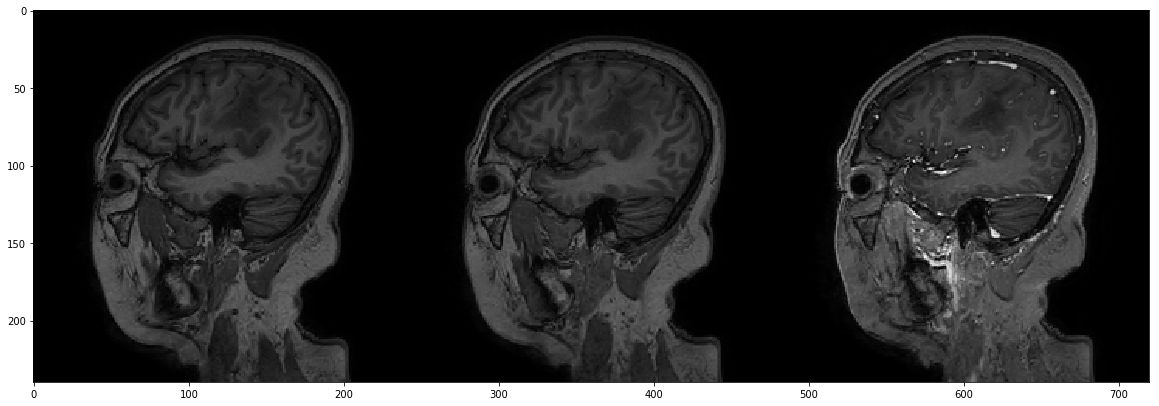

In [121]:
idx = 60
plt.figure(figsize=(20,10))
suplot.imshowtile(np.stack((im0[idx,...], im1[idx,...], im2[idx,...]), axis=2))

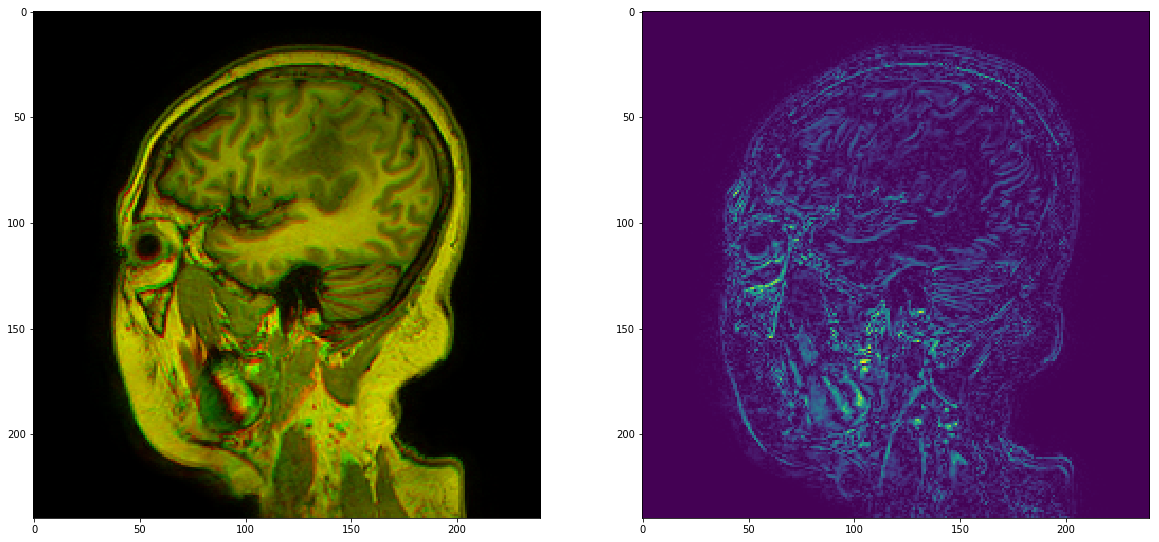

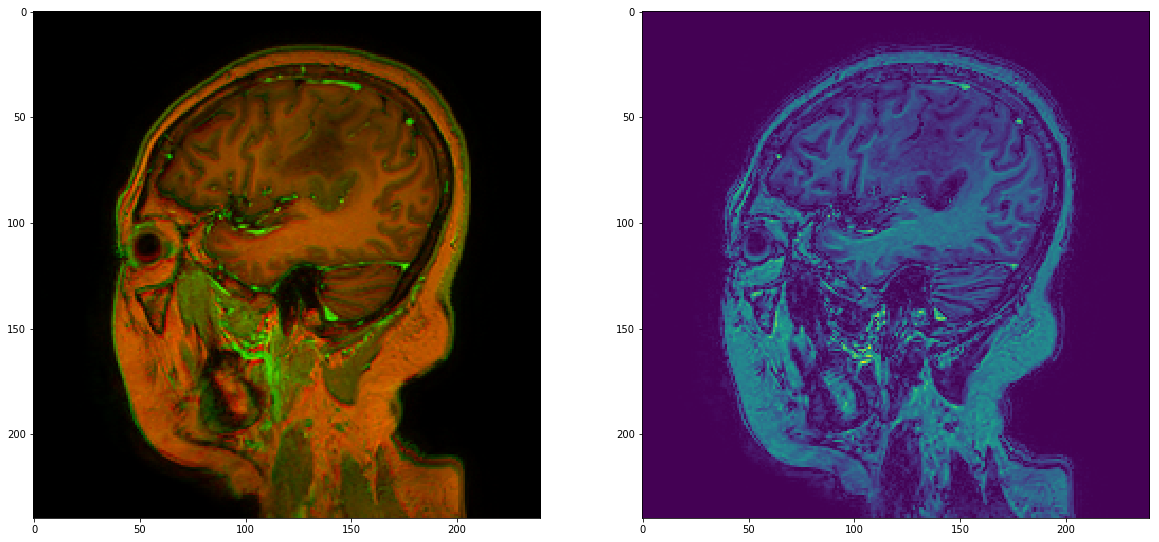

In [122]:
plt.figure(figsize=(20,10))
suplot.imshowreg(im0[idx,...], im1[idx,...])
plt.figure(figsize=(20,10))
suplot.imshowreg(im0[idx,...], im2[idx,...])


In [123]:
spars = sitk.GetDefaultParameterMap('rigid')
im1_reg, p1_reg = sup.register_im(im0, im1, param_map=spars)
im2_reg, p2_reg = sup.register_im(im0, im2, param_map=spars)

image registration
registration done, 5.44 s
image registration
registration done, 5.38 s


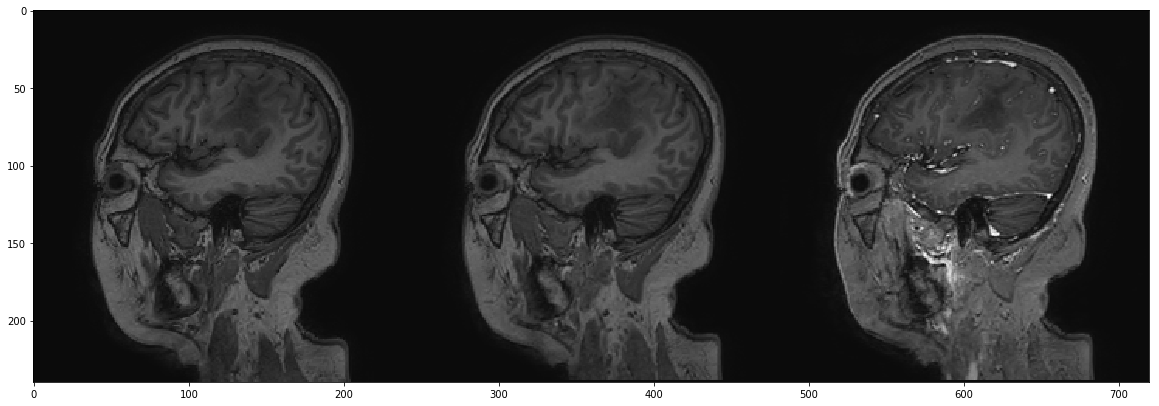

In [124]:
plt.figure(figsize=(20,10))
suplot.imshowtile(np.stack((im0[idx,...], im1_reg[idx,...], im2_reg[idx,...]), axis=2))

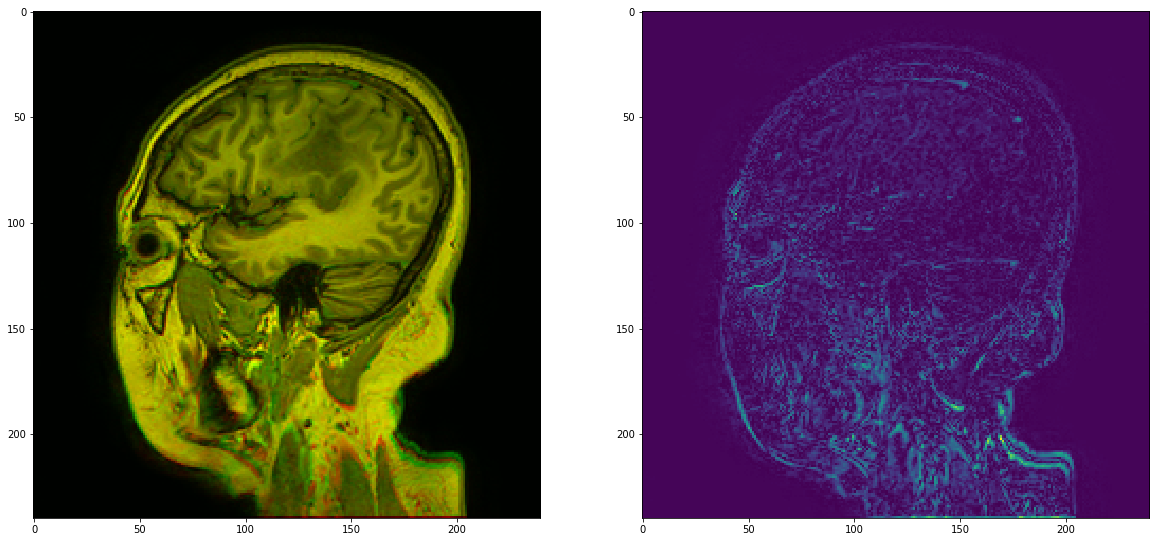

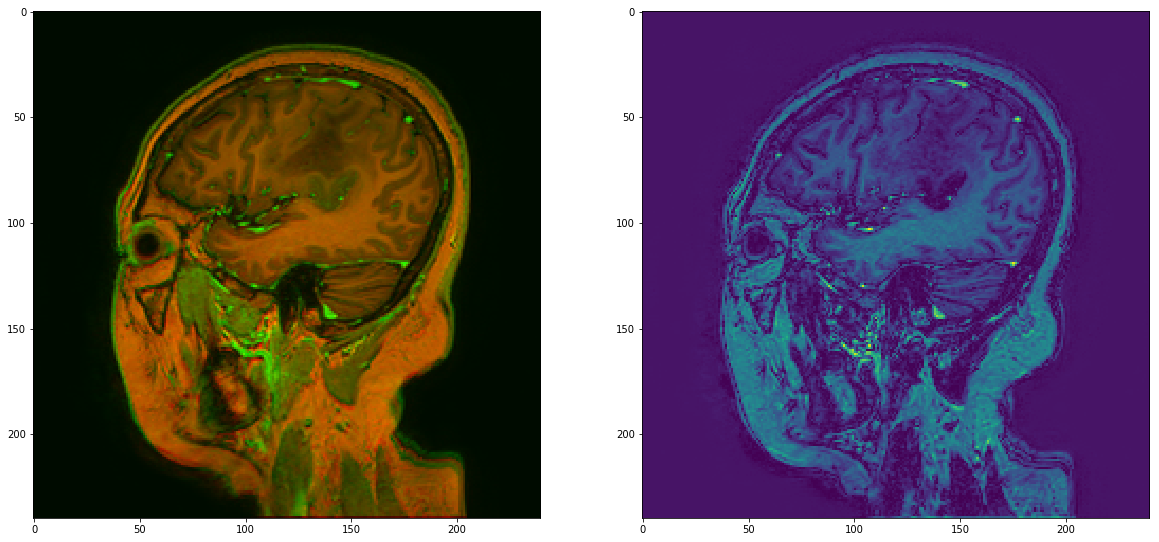

In [125]:
plt.figure(figsize=(20,10))
suplot.imshowreg(im0[idx,...], im1_reg[idx,...])
plt.figure(figsize=(20,10))
suplot.imshowreg(im0[idx,...], im2_reg[idx,...])


In [126]:
hd1

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0012) Instance Creation Date              DA: '20190321'
(0008, 0013) Instance Creation Time              TM: '221507.730'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.89.5
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.78161.5.0.5772.2019032121024172114
(0008, 0020) Study Date                          DA: '20190321'
(0008, 0021) Series Date                         DA: '20190321'
(0008, 0022) Acquisition Date                    DA: '20190321'
(0008, 0023) Content Date                        DA: '20190321'
(0008, 0030) Study Time                          TM: '204954'
(0008, 0031) Series Time                         TM: '210013.34000'
(0008, 0032) Acquisition Time                    TM: '210017.95'
(0008

In [127]:
rescale_slope_0 = float(hd0.RescaleSlope)
rescale_intercept_0 = float(hd0.RescaleIntercept)
scale_slope_0 = hd0[0x2005, 0x100e].value

rescale_slope_1 = float(hd1.RescaleSlope)
rescale_intercept_1 = float(hd1.RescaleIntercept)
scale_slope_1 = hd1[0x2005, 0x100e].value

rescale_slope_2 = float(hd2.RescaleSlope)
rescale_intercept_2 = float(hd2.RescaleIntercept)
scale_slope_2 = hd2[0x2005, 0x100e].value

In [128]:
print(rescale_slope_0, rescale_slope_1, rescale_slope_2)
print(rescale_intercept_0, rescale_intercept_1, rescale_intercept_2)
print(scale_slope_0, scale_slope_1, scale_slope_2)

6.06007326007326 42.7369963369963 2.68400488400488
0.0 0.0 0.0
0.0033916488755494356 0.0033916484098881483 0.0033916484098881483


In [129]:
def scale_slope_intercept(im, rs, ri, ss):
    return (im * rs + ri) / (rs * ss)
def rescale_slope_intercept(im, rs, ri, ss):
     return (im * rs * ss - ri) / rs

print(np.mean(im0))
print(np.mean(scale_slope_intercept(im0, rescale_slope_0, rescale_intercept_0, scale_slope_0)))
print(np.mean(rescale_slope_intercept(scale_slope_intercept(im0, rescale_slope_0, rescale_intercept_0, scale_slope_0), rescale_slope_0, rescale_intercept_0, scale_slope_0)))

54.259434
15997.957
54.259434


In [130]:
def rescale_im(im, rescale_slope, rescale_intercept, scale_slope):
    return (im * rescale_slope + rescale_intercept) / (rescale_slope * scale_slope)

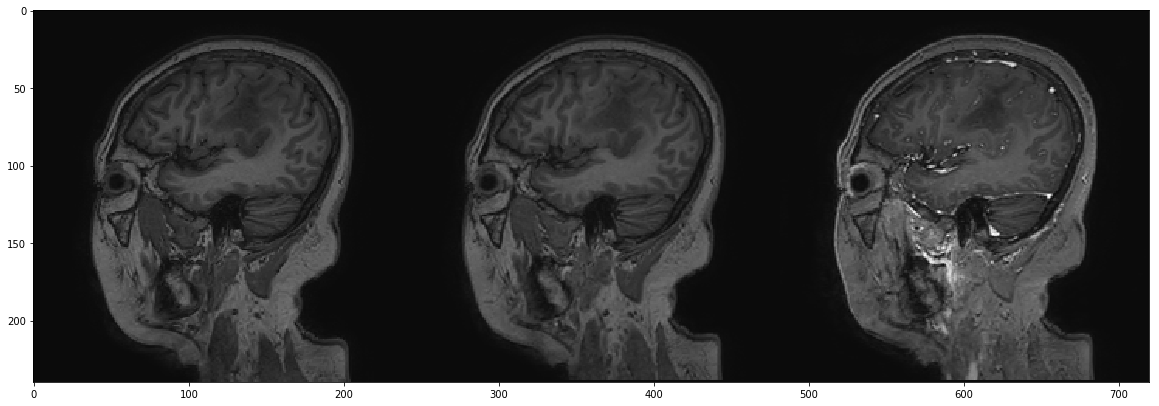

In [131]:
im0_reg_rescale = rescale_im(im0, rescale_slope_0, rescale_intercept_0, scale_slope_0)
im1_reg_rescale = rescale_im(im1_reg, rescale_slope_1, rescale_intercept_1, scale_slope_1)
im2_reg_rescale = rescale_im(im2_reg, rescale_slope_2, rescale_intercept_2, scale_slope_2)

plt.figure(figsize=(20,10))
suplot.imshowtile(np.stack((im0_reg_rescale[idx,...], im1_reg_rescale[idx,...], im2_reg_rescale[idx,...]), axis=2))

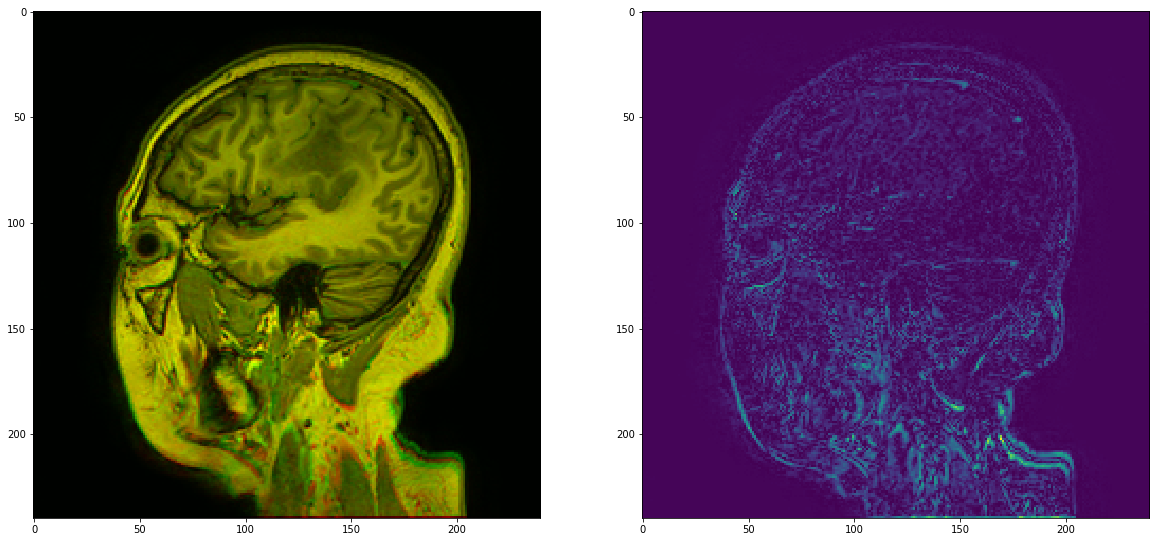

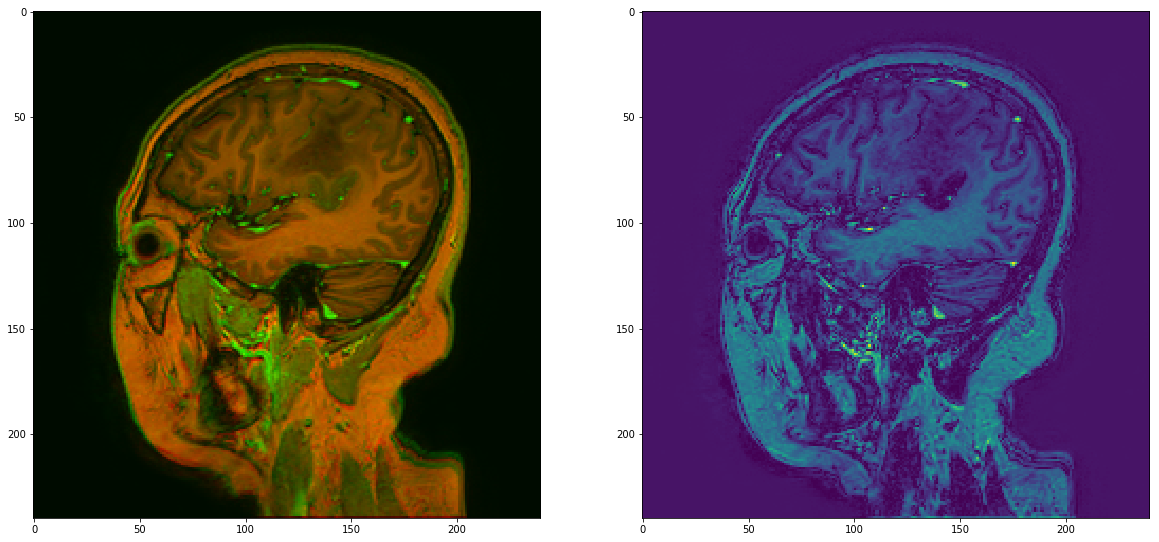

In [132]:
plt.figure(figsize=(20,10))
suplot.imshowreg(im0_reg_rescale[idx,...], im1_reg_rescale[idx,...])
plt.figure(figsize=(20,10))
suplot.imshowreg(im0_reg_rescale[idx,...], im2_reg_rescale[idx,...])

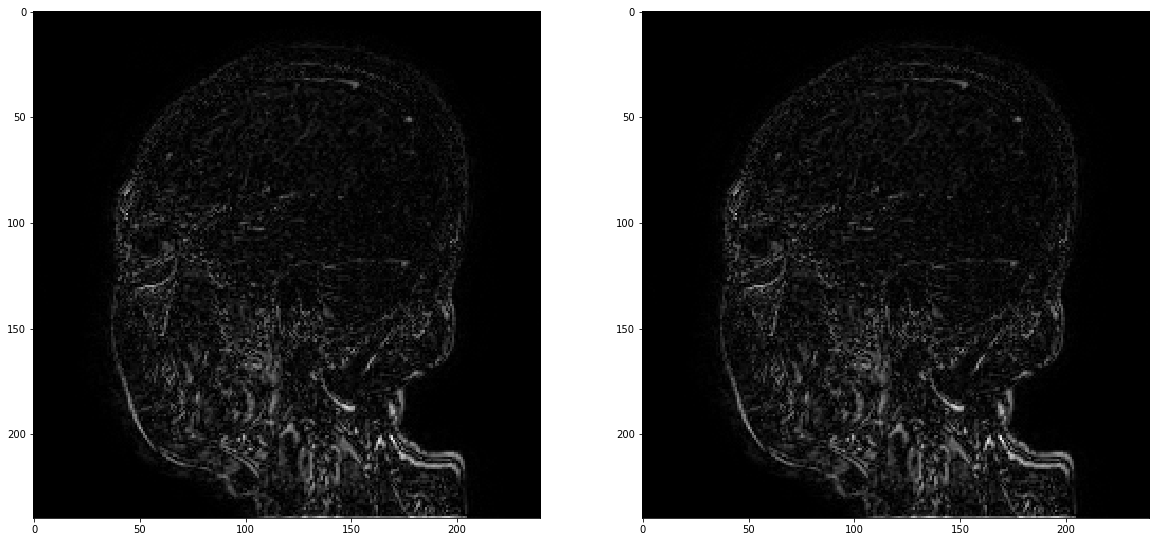

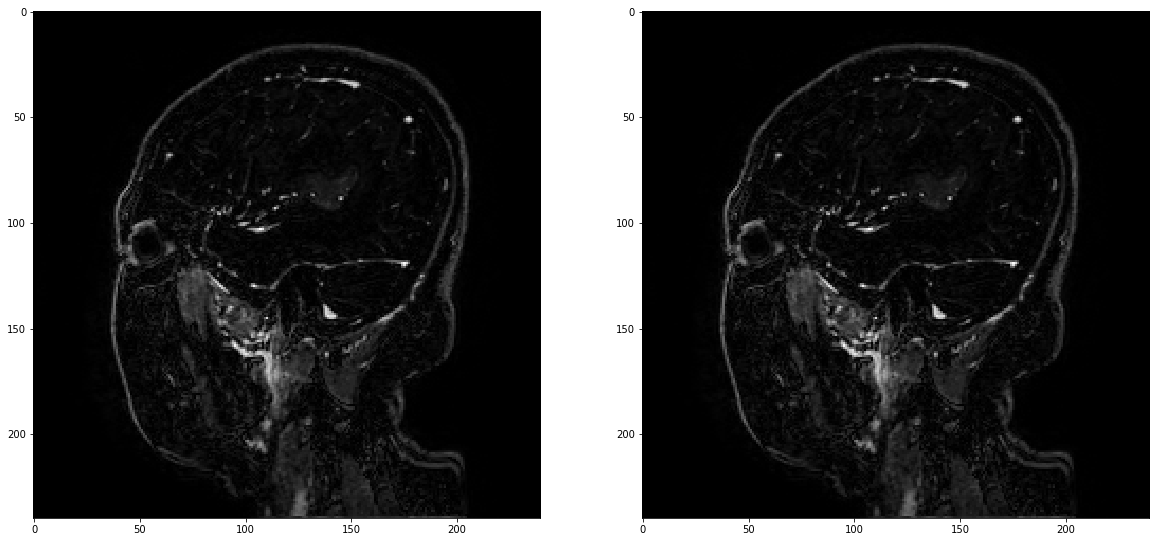

In [133]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(abs(im1_reg[idx,...] - im0[idx,...]), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(abs(im1_reg_rescale[idx,...] - im0_reg_rescale[idx,...]), cmap='gray')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(abs(im2_reg[idx,...] - im0[idx,...]), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(abs(im2_reg_rescale[idx,...] - im0_reg_rescale[idx,...]), cmap='gray')

In [134]:
data = suio.load_file('/raid/jon/data_full_tiantan/data/Brain3H-600437593.h5')
metadata = suio.load_h5_metadata('/raid/jon/data_full_tiantan/data/Brain3H-600437593.h5')
print(data.shape)
print(metadata)

(196, 3, 240, 240)
{'reg': array(1), 'mask_threshold': array(0.08), 'transform_type': array('rigid', dtype=object), 'scale_full': array(0.96045348), 'mask': array(1), 'pixel_spacing_low': array([0.99991721, 0.99991721, 1.        ]), 'scale_low': array(1.00366969), 'hist_norm': array(1), 'pixel_spacing_full': array([0.99991721, 0.99991721, 1.        ]), 'scale_global': array([[141.05774, 148.1694 , 145.82819]], dtype=float32), 'scale_slices': array([ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107]), 'pixel_spacing_zero': array([0.99991721, 0.99991721, 1.        ]), 'slice_idx': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64

In [135]:
data2 = np.stack((im0_reg_rescale, im1_reg_rescale, im2_reg_rescale), axis=1)
print(data2.shape)
suio.save_data_h5('/raid/jon/data_full_tiantan/data/Brain3H-600437593_absolute_rescale.h5', data=data2, metadata=metadata)

(196, 3, 240, 240)


0

(196, 240, 240, 1)


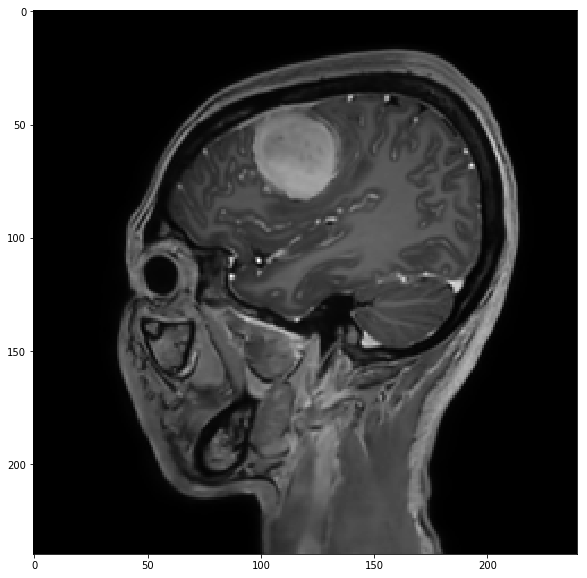

In [138]:
data_pred = suio.load_file('/raid/jon/predictions/Tiantan/data_predict_Test_Hoag_on_Tiantan.npy')
print(data_pred.shape)
idx = 60
plt.figure(figsize=(15,10))
plt.imshow(abs(data_pred[idx,...].squeeze()), cmap='gray')